In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,precision_score,recall_score,f1_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from tabulate import tabulate
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [4]:
movie_df = pd.read_csv('movie_data.csv')
movie_df

,budget,original_language,popularity,revenue,runtime,status,title,vote_average,vote_count,release_year,release_month,genre_type,production_country,lead_name,production_company,lead_chrctr_name,directors,profit
0,237000000,en,150.437577,2787965087,107.0,Released,Avatar,7.2,11800,2009,10,Action,United States of America,Sam Worthington,Ingenious Film Partners,Jake Sully,James Cameron,2550965087
1,300000000,en,139.082615,961000000,107.0,Released,Pirates of the Caribbean: At World's End,6.9,4500,2007,5,Adventure,United States of America,Johnny Depp,Walt Disney Pictures,Captain Jack Sparrow,Gore Verbinski,661000000
2,245000000,en,107.376788,880674609,148.0,Released,Spectre,6.3,4466,2015,10,Action,United Kingdom,Daniel Craig,Columbia Pictures,James Bond,Sam Mendes,635674609
3,250000000,en,112.312950,1084939099,107.0,Released,The Dark Knight Rises,7.6,9106,2012,7,Action,United States of America,Christian Bale,Legendary Pictures,Bruce Wayne / Batman,Christopher Nolan,834939099
4,260000000,en,43.926995,284139100,132.0,Released,John Carter,6.1,2124,2012,7,Action,United States of America,Taylor Kitsch,Walt Disney Pictures,John Carter,Andrew Stanton,24139100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3224,27000,en,19.748658,3151130,92.0,Released,Clerks,7.4,755,1994,9,Comedy,United States of America,Brian O'Halloran,Miramax Films,Dante Hicks,Kevin Smith,3124130
3225,12000,en,4.553644,6000000,93.0,Released,Pink Flamingos,6.2,110,1972,12,Horror,United States of America,Divine,Dreamland Productions,Divine / Babs Johnson,John Waters,5988000
3226,20000,ja,0.212443,99000,111.0,Released,Cure,7.4,63,1997,6,Crime,Japan,Koji Yakusho,Daiei Studios,Kenichi Takabe,Kiyoshi Kurosawa,79000
3227,7000,en,23.307949,424760,77.0,Released,Primer,6.9,658,2004,8,Science Fiction,United States of America,Shane Carruth,Thinkfilm,Aaron,Shane Carruth,417760


In [5]:
movie_df.isnull().sum()

budget                0
original_language     0
popularity            0
revenue               0
runtime               0
status                0
title                 0
vote_average          0
vote_count            0
release_year          0
release_month         0
genre_type            0
production_country    0
lead_name             0
production_company    0
lead_chrctr_name      2
directors             0
profit                0
dtype: int64

In [6]:
movie_df.dropna(inplace=True)

In [7]:
movie_df.isnull().sum()

budget                0
original_language     0
popularity            0
revenue               0
runtime               0
status                0
title                 0
vote_average          0
vote_count            0
release_year          0
release_month         0
genre_type            0
production_country    0
lead_name             0
production_company    0
lead_chrctr_name      0
directors             0
profit                0
dtype: int64

In [8]:
from tabulate import tabulate
def dtype(col):
    cat = []
    con = []
    for col in movie_df:
        if(movie_df[col].dtypes == 'object'):
            cat.append(col)
        else:
            con.append(col)
    return cat, con
cat, con = dtype(movie_df)
table = [cat, con]
print(tabulate({"Categorical": cat, "Continuous": con}, headers=['Category', "Continuous"]))

Category            Continuous
------------------  -------------
original_language   budget
status              popularity
title               revenue
genre_type          runtime
production_country  vote_average
lead_name           vote_count
production_company  release_year
lead_chrctr_name    release_month
directors           profit


In [9]:
movie_df.genre_type.value_counts()

Drama              747
Comedy             634
Action             588
Adventure          288
Horror             197
Crime              141
Thriller           118
Animation           99
Fantasy             93
Science Fiction     78
Romance             70
Family              38
Documentary         30
Mystery             27
Western             22
Music               20
History             18
War                 18
Foreign              1
Name: genre_type, dtype: int64

In [10]:
#Object to Categorical
for i in cat:
    movie_df[i]= movie_df[i].astype("category")
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3227 entries, 0 to 3228
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   budget              3227 non-null   int64   
 1   original_language   3227 non-null   category
 2   popularity          3227 non-null   float64 
 3   revenue             3227 non-null   int64   
 4   runtime             3227 non-null   float64 
 5   status              3227 non-null   category
 6   title               3227 non-null   category
 7   vote_average        3227 non-null   float64 
 8   vote_count          3227 non-null   int64   
 9   release_year        3227 non-null   int64   
 10  release_month       3227 non-null   int64   
 11  genre_type          3227 non-null   category
 12  production_country  3227 non-null   category
 13  lead_name           3227 non-null   category
 14  production_company  3227 non-null   category
 15  lead_chrctr_name    3227 non-null   ca

In [11]:
label_encoder = preprocessing.LabelEncoder()
for i in cat:
    movie_df[i] = label_encoder.fit_transform(movie_df[i])
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3227 entries, 0 to 3228
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   budget              3227 non-null   int64  
 1   original_language   3227 non-null   int32  
 2   popularity          3227 non-null   float64
 3   revenue             3227 non-null   int64  
 4   runtime             3227 non-null   float64
 5   status              3227 non-null   int32  
 6   title               3227 non-null   int32  
 7   vote_average        3227 non-null   float64
 8   vote_count          3227 non-null   int64  
 9   release_year        3227 non-null   int64  
 10  release_month       3227 non-null   int64  
 11  genre_type          3227 non-null   int32  
 12  production_country  3227 non-null   int32  
 13  lead_name           3227 non-null   int32  
 14  production_company  3227 non-null   int32  
 15  lead_chrctr_name    3227 non-null   int32  
 16  direct

In [12]:
movie_df = movie_df.drop(movie_df[movie_df['genre_type'] == 9].index)

In [13]:
num_cat = ['int32', 'float64', 'int64']
num_df  = movie_df.select_dtypes(include=num_cat)
scaler = StandardScaler()
scale_df = pd.DataFrame(scaler.fit_transform(num_df), columns=num_df.columns)
scale_df

,budget,original_language,popularity,revenue,runtime,status,title,vote_average,vote_count,release_year,release_month,genre_type,production_country,lead_name,production_company,lead_chrctr_name,directors,profit
0,4.421821,-0.138005,3.356024,14.311189,-0.096406,0.017609,-1.457447,1.019195,7.650907,0.551263,0.899043,-1.091329,0.502633,1.172572,-0.507021,-0.208877,-0.468589,15.616892
1,5.840867,-0.138005,3.042068,4.506264,-0.096406,0.017609,0.155552,0.675976,2.489892,0.400687,-0.539747,-0.874968,0.502633,-0.061785,1.232266,-1.243993,-0.645036,3.668855
2,4.602017,-0.138005,2.165428,4.075175,2.396502,0.017609,0.549673,-0.010462,2.465854,1.002990,0.899043,-1.091329,0.425778,-1.014997,-1.367558,-0.194229,1.088438,3.508752
3,4.714640,-0.138005,2.301909,5.171418,-0.096406,0.017609,0.866474,1.476821,5.746281,0.777126,0.035769,-1.091329,0.502633,-1.143520,-0.279365,-1.308688,-1.248295,4.768468
4,4.939886,-0.138005,0.411092,0.873698,1.423660,0.017609,-0.379251,-0.239275,0.810088,0.777126,0.035769,-1.091329,0.502633,1.434973,1.232266,-0.022117,-1.620264,-0.357271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3221,-0.915888,-0.138005,-0.257420,-0.634303,-1.008445,0.017609,-1.163198,1.248008,-0.157780,-0.578055,0.611285,-0.442246,0.502633,-1.347015,0.007480,-0.968125,0.072675,-0.490124
3222,-0.916226,-0.138005,-0.677550,-0.619014,-0.947643,0.017609,0.151256,-0.124868,-0.613787,-2.234387,1.474559,1.288643,0.502633,-0.902540,-1.130797,-0.866810,-0.151461,-0.472019
3223,-0.916046,4.231488,-0.797581,-0.650683,0.146805,0.017609,-1.091246,1.248008,-0.647016,-0.352191,-0.251989,-0.225885,-0.880763,0.214004,-1.267390,0.151216,0.096519,-0.509375
3224,-0.916338,-0.138005,-0.159008,-0.648935,-1.920485,0.017609,0.198508,0.675976,-0.226357,0.174824,0.323527,2.154088,0.502633,1.271642,0.977292,-1.729814,1.159970,-0.507233


In [14]:
corel_matrix = scale_df.corr()
corel_matrix

,budget,original_language,popularity,revenue,runtime,status,title,vote_average,vote_count,release_year,release_month,genre_type,production_country,lead_name,production_company,lead_chrctr_name,directors,profit
budget,1.000000,-0.063334,0.431659,0.705289,0.244938,0.015345,0.039848,-0.031026,0.539933,0.267469,0.011046,-0.181742,-0.011532,0.000223,0.059268,-0.008933,-0.011813,0.550135
original_language,-0.063334,1.000000,-0.048089,-0.054663,0.043685,0.002430,-0.007116,0.055271,-0.056833,0.040839,-0.010134,-0.014534,-0.163559,0.006829,-0.045619,0.005948,0.029065,-0.046615
popularity,0.431659,-0.048089,1.000000,0.602094,0.164768,0.013321,-0.001895,0.287272,0.748973,0.161560,0.011815,-0.028155,0.005916,0.002116,0.056938,0.015631,-0.031536,0.588089
revenue,0.705289,-0.054663,0.602094,1.000000,0.216023,0.011388,0.028139,0.188018,0.756130,0.147605,0.019027,-0.120444,0.047935,0.029664,0.067374,0.003643,-0.020746,0.980006
runtime,0.244938,0.043685,0.164768,0.216023,1.000000,-0.000444,0.048338,0.345407,0.245993,-0.065479,0.077740,0.012551,-0.031070,0.015673,-0.010427,-0.014451,0.017633,0.185720
status,0.015345,0.002430,0.013321,0.011388,-0.000444,1.000000,0.010063,0.020330,0.012003,-0.012359,-0.005697,-0.003642,-0.008851,-0.028145,-0.004622,0.018316,-0.027312,0.009107
title,0.039848,-0.007116,-0.001895,0.028139,0.048338,0.010063,1.000000,0.040780,0.021769,0.021935,0.022070,0.026211,-0.015536,-0.029816,0.002882,0.055797,-0.011246,0.021962
vote_average,-0.031026,0.055271,0.287272,0.188018,0.345407,0.020330,0.040780,1.000000,0.377934,-0.191401,0.083014,0.070730,-0.001005,0.012651,-0.016374,0.005601,-0.018211,0.230184
vote_count,0.539933,-0.056833,0.748973,0.756130,0.245993,0.012003,0.021769,0.377934,1.000000,0.173547,0.004424,-0.061536,0.024720,0.000438,0.046145,0.016736,-0.025828,0.739147
release_year,0.267469,0.040839,0.161560,0.147605,-0.065479,-0.012359,0.021935,-0.191401,0.173547,1.000000,-0.049395,-0.015397,-0.114685,-0.013084,-0.101917,0.017066,-0.022985,0.098803


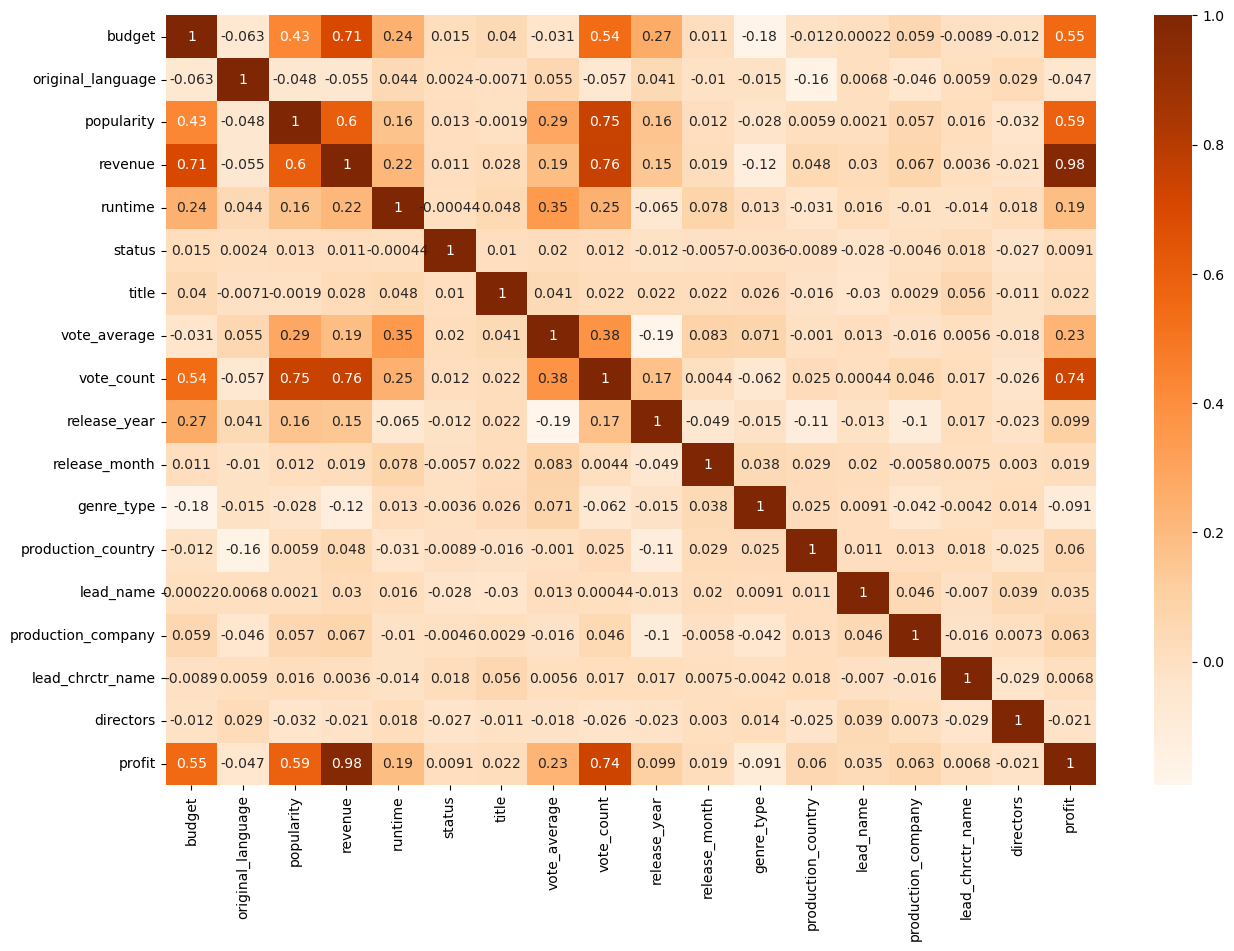

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(corel_matrix, annot = True, cmap = 'Oranges')
plt.show()

In [16]:
def correlation(df,threshold):
    col_corr=set()
    corel_matrix=df.corr()
    for i in range(len(corel_matrix.columns)):
        for j in range(i):
            if(abs(corel_matrix.iloc[i,j]))>threshold:
                col_name=corel_matrix.columns[i]
                col_corr.add(col_name)
    return col_corr

In [17]:
sel_features=correlation(scale_df,0.5)
len(set(sel_features))

3

In [18]:
sel_features

{'profit', 'revenue', 'vote_count'}

balancing the data:

In [19]:
from imblearn.over_sampling import SMOTE

In [20]:
x = scale_df.drop(['profit','revenue', 'genre_type'], axis = 1)
y = movie_df['genre_type']

In [21]:
os  = SMOTE()
x1, y1 = os.fit_resample(x,y)
X1_train, X1_test, y1_train, y1_test = train_test_split(x1,y1, test_size=0.3, random_state=42)
print(X1_train.shape)
print(y1_train.shape)

(9412, 15)
(9412,)


### Logistic Regression

In [22]:
lr_bal_model=LogisticRegression().fit(X1_train,y1_train)


In [23]:
y_pred_lrbal=lr_bal_model.predict(X1_test)
y_pred_lrbal

array([15,  8,  4, ...,  7,  0,  3])

In [24]:
log_prob_bal = lr_bal_model.predict_proba(X1_test)
log_prob_bal = log_prob_bal[:,1]
r_prob_bal = [0 for _ in range(len(y1_test))]

In [25]:
train_accrcy_score = []
test_accrcy_score = []
test_f1_score = []
auc_roc = []
recall = []
precision = []

In [26]:
lr_bal_actrain = lr_bal_model.score(X1_train, y1_train)
lr_bal_actest = lr_bal_model.score(X1_test, y1_test)

print("train_acc_score", lr_bal_actrain)
train_accrcy_score.append(lr_bal_actrain)

print("test_acc_score", lr_bal_actest)
test_accrcy_score.append(lr_bal_actest)

train_acc_score 0.3383977900552486
test_acc_score 0.3165592464055528


In [27]:
f1_test_lrbal = f1_score(y1_test, y_pred_lrbal, average='micro')
test_f1_score.append(f1_test_lrbal)

print("f1_test_score", f1_test_lrbal)

f1_test_score 0.3165592464055528


In [28]:
lr_precision = precision_score(y1_test,y_pred_lrbal, average = 'micro')
precision.append(lr_precision)
print("Model precision_score :",lr_precision)

Model precision_score : 0.3165592464055528


In [29]:
lr_recall=recall_score(y1_test,y_pred_lrbal,average = 'micro')
recall.append(lr_recall)
print("Model recall_score :",lr_recall)

Model recall_score : 0.3165592464055528


In [30]:
print(confusion_matrix(y1_test,y_pred_lrbal))

[[ 18  30  10   9   1   2   4  11   9   4  21  11  12  12  25  16  18   6]
 [ 10  41  32  10   3   1   0  11  17  11   9  15   4   1  27   4  12  21]
 [  5   5 154   2   0   2   0  38   6   0   0   1   3   3   9   3   1   3]
 [  4   1   9  20   8  22   1  15   2   6  32  19   9  11  17  22   8   4]
 [  4   3   4  18  28  16   6   1   0  12   8  18  17  11   3  26  21  13]
 [  0   0   0   0   6 190   2   0   0   5   7   2   0   0   0   6   0   0]
 [  5   4   3   9  11  24  13   1   2  29   7  23   9   7   9  22  26  22]
 [  0   8  52  25   0   0   2  69   7   0  12  23   8  23   1   2   0   2]
 [ 20   7  18  10   6   0   5  22  26   7   9  14  14   8  32  10   3   3]
 [  0   0   0   0   7  16   8   0   5  75   3  13   4   0   0  14  33  23]
 [  5   3   2  13   8   7   1   4   7   1 122  14  19   3   5  11   2   7]
 [  0   4   0  25   2  13   0   2   0  33   1 115  10  12   0   2   3  24]
 [  6   3  18  16   9   0   5  15  10   2  32   8  62   0   8  12  21   0]
 [  6   0   3  21  22  33

In [31]:
print(classification_report(y1_test,y_pred_lrbal))


              precision    recall  f1-score   support

           0       0.17      0.08      0.11       219
           1       0.26      0.18      0.21       229
           2       0.49      0.66      0.56       235
           3       0.10      0.10      0.10       210
           4       0.20      0.13      0.16       209
           5       0.57      0.87      0.69       218
           6       0.16      0.06      0.09       226
           7       0.33      0.29      0.31       234
           8       0.25      0.12      0.16       214
          10       0.24      0.37      0.30       201
          11       0.36      0.52      0.43       234
          12       0.35      0.47      0.40       246
          13       0.27      0.27      0.27       227
          14       0.13      0.07      0.10       230
          15       0.30      0.30      0.30       235
          16       0.20      0.24      0.22       221
          17       0.25      0.30      0.27       213
          18       0.46    

### Naive Bayes

In [32]:
gn_bal_model=GaussianNB().fit(X1_train,y1_train)
y_pred_gnbal=gn_bal_model.predict(X1_test)

In [33]:
gn_bal_actrain = gn_bal_model.score(X1_train, y1_train)
gn_bal_actest = gn_bal_model.score(X1_test, y1_test)

print("br_train_acc_score", gn_bal_actrain)
train_accrcy_score.append(gn_bal_actrain)
print("br_test_acc_score", gn_bal_actest)
test_accrcy_score.append(gn_bal_actest)

br_train_acc_score 0.14768380790480237
br_test_acc_score 0.15642042637580567


In [34]:
f1_test_gnbal = f1_score(y1_test, y_pred_gnbal, average='micro')
test_f1_score.append(f1_test_gnbal)

print("f1_test_score", f1_test_gnbal)

f1_test_score 0.15642042637580567


In [35]:
gn_precision = precision_score(y1_test,y_pred_gnbal,average='micro')
precision.append(gn_precision)
print("Model precision_score :",gn_precision)

Model precision_score : 0.15642042637580567


In [36]:
gn_recall=recall_score(y1_test,y_pred_gnbal, average='micro')
recall.append(gn_recall)
print("Model recall_score :",gn_recall)

Model recall_score : 0.15642042637580567


In [37]:
print(confusion_matrix(y1_test,y_pred_gnbal))

[[  1  20   0   1   0   0   0   2   8   2   1  37  89   0   1   0  57   0]
 [  1  24   3   1   0   1   0   1  12   0   1  52  56   0   6   0  71   0]
 [  1   4  18   0   0   0   0   1   5   3   3  28 117   0  21   3  31   0]
 [  0   0   1   1   1   2   0   0   0   2   0  78  99   0   0   0  26   0]
 [  0   0   0   1   2   1   0   0   4   2   0  90  53   1   1   0  54   0]
 [  0   0   0   0   0  22   0   0   2   2   0 123  52   0   0   0  17   0]
 [  0   6   0   0   2   1   0   0   4   0   1  91  43   0   4   0  74   0]
 [  0   0   4   0   0   0   0   6   8   0   0  58 103   0  15   0  40   0]
 [  2   5   6   0   0   0   0   0  15   2   1  33  99   0   3   0  48   0]
 [  0   0   0   1   0   0   0   0   1  11   0  87  13   0   3   0  85   0]
 [  0   0   0   0   0   0   0   0   2   0   1  90 122   0   2   1  16   0]
 [  0   0   0   0   0   0   0   0   0   0   0 217  14   0   0   0  15   0]
 [  0   2   0   0   0   0   0   0   0   0   0  67 145   0   1   0  12   0]
 [  0   0   0   0   1   2

In [38]:
print(classification_report(y1_test,y_pred_gnbal))

              precision    recall  f1-score   support

           0       0.20      0.00      0.01       219
           1       0.31      0.10      0.16       229
           2       0.56      0.08      0.13       235
           3       0.17      0.00      0.01       210
           4       0.29      0.01      0.02       209
           5       0.73      0.10      0.18       218
           6       0.00      0.00      0.00       226
           7       0.60      0.03      0.05       234
           8       0.23      0.07      0.11       214
          10       0.42      0.05      0.10       201
          11       0.07      0.00      0.01       234
          12       0.15      0.88      0.25       246
          13       0.11      0.64      0.19       227
          14       0.60      0.01      0.03       230
          15       0.32      0.12      0.18       235
          16       0.00      0.00      0.00       221
          17       0.12      0.50      0.20       213
          18       0.94    

### Decision Tree Classifier

In [7]:
kf=KFold(n_splits=5, shuffle=True, random_state=42)

In [39]:
dt = DecisionTreeClassifier()

In [40]:
param_grid_dtbal={"min_samples_split":np.arange(10,51,10),
            "min_samples_leaf":np.arange(10,101,20),
            "max_depth":np.arange(3,15)
}

In [41]:
grid_cv_dtbal = GridSearchCV(dt,param_grid_dtbal,cv=kf,scoring="precision") #remove scoring


In [42]:
grid_cv_dtbal.fit(X1_train,y1_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_leaf': array([10, 30, 50, 70, 90]),
                         'min_samples_split': array([10, 20, 30, 40, 50])},
             scoring='precision')

In [43]:
grid_cv_dtbal.best_score_

nan

In [44]:
grid_cv_dtbal.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, min_samples_split=10)

In [39]:
dt_bal_model = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, min_samples_split=10)
dt_bal_model.fit(x1,y1)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, min_samples_split=10)

In [40]:
dt_bal_actrain = dt_bal_model.score(X1_train, y1_train)
dt_bal_actest = dt_bal_model.score(X1_test, y1_test)

print("dt_train_acc_score", dt_bal_actrain)
train_accrcy_score.append(dt_bal_actrain)
print("dt_test_acc_score", dt_bal_actest)
test_accrcy_score.append(dt_bal_actest)

dt_train_acc_score 0.21653208669783255
dt_test_acc_score 0.21789786812097173


In [41]:
y_pred_dtbal=dt_bal_model.predict(X1_test)

In [42]:
f1_test_dtbal = f1_score(y1_test, y_pred_dtbal,average='micro')
test_f1_score.append(f1_test_dtbal)

print("f1_test_score", f1_test_dtbal)

f1_test_score 0.21789786812097173


In [43]:
dt_precision = precision_score(y1_test,y_pred_dtbal,average='micro')
precision.append(dt_precision)
print("Model precision_score :",dt_precision)

Model precision_score : 0.21789786812097173


In [44]:
dt_recall=recall_score(y1_test,y_pred_dtbal,average='micro')
recall.append(dt_recall)
print("Model recall_score :",dt_recall)

Model recall_score : 0.21789786812097173


In [45]:
print(confusion_matrix(y1_test,y_pred_dtbal))

[[  0   0  15   0   0   2   0   0   0   0   5   4  65   0  47   0  76   5]
 [  0   0  35   0   0   1   0   0   0   0   2   3  49   0  61   0  69   9]
 [  0   0 155   0   0   0   0   0   0   0   0   0  66   0   6   0   4   4]
 [  0   0  11   0   0  16   0   0   0   0  13   2 105   0   8   0  52   3]
 [  0   0   7   0   0   8   0   0   0   0  13   0  60   0  21   0  96   4]
 [  0   0   0   0   0 128   0   0   0   0  36   0  42   0   0   0  12   0]
 [  0   0   1   0   0  13   0   0   0   0  12   6  41   0  22   0 120  11]
 [  0   0  74   0   0   1   0   0   0   0   3   0 133   0   6   0  16   1]
 [  0   0  37   0   0   0   0   0   0   0   6   0  97   0  32   0  42   0]
 [  0   0   1   0   0   6   0   0   0   0   0   9  11   0   8   0 156  10]
 [  0   0   0   0   0   5   0   0   0   0  67   1 129   0  13   0  18   1]
 [  0   0   0   0   0   6   0   0   0   0   0  16 141   0   0   0  81   2]
 [  0   0  15   0   0   0   0   0   0   0  10   0 141   0  16   0  43   2]
 [  0   0   3   0   0   7

In [46]:
print(classification_report(y1_test,y_pred_dtbal))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       219
           1       0.00      0.00      0.00       229
           2       0.39      0.66      0.49       235
           3       0.00      0.00      0.00       210
           4       0.00      0.00      0.00       209
           5       0.65      0.59      0.62       218
           6       0.00      0.00      0.00       226
           7       0.00      0.00      0.00       234
           8       0.00      0.00      0.00       214
          10       0.00      0.00      0.00       201
          11       0.33      0.29      0.30       234
          12       0.34      0.07      0.11       246
          13       0.11      0.62      0.18       227
          14       0.00      0.00      0.00       230
          15       0.19      0.31      0.24       235
          16       0.00      0.00      0.00       221
          17       0.14      0.82      0.23       213
          18       0.66    

In [217]:
from sklearn import tree

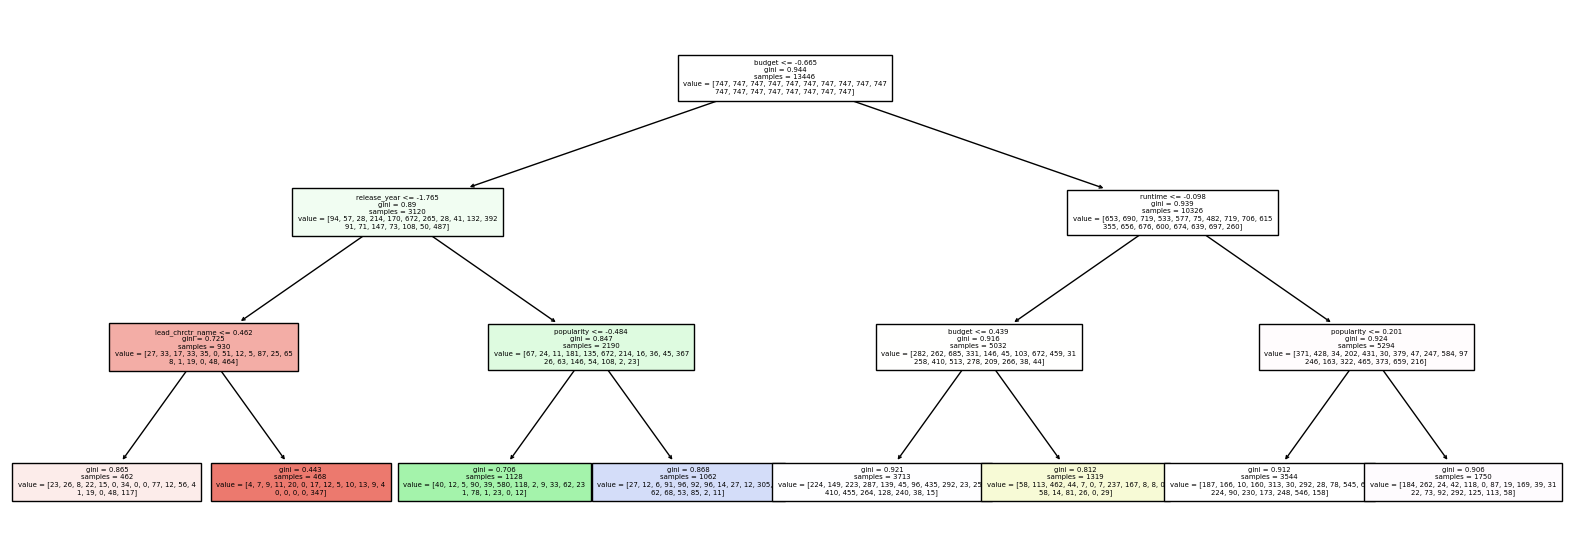

In [218]:
plt.figure(figsize=(20,7))
tree.plot_tree(dt_bal_model,feature_names=x1.columns,filled=True,fontsize=5)
plt.show()

### Random Forest

In [4]:
param_grid_bal={"n_estimators":np.arange(20,101,20),
            "min_samples_split":np.arange(10,51,10),
            "min_samples_leaf":np.arange(10,101,20),
            "max_depth":np.arange(3,15)}

In [5]:
rf_bal = RandomForestClassifier()

In [8]:
grid_cv_bal=GridSearchCV(rf_bal,param_grid_bal,cv=kf,scoring="accuracy")

In [58]:
grid_cv_bal.fit(x1,y1)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_leaf': array([10, 30, 50, 70, 90]),
                         'min_samples_split': array([10, 20, 30, 40, 50]),
                         'n_estimators': array([ 20,  40,  60,  80, 100])},
             scoring='precision')

In [ ]:
grid_cv_bal.best_score_

In [60]:
grid_cv_bal.best_params_

{'max_depth': 3,
 'min_samples_leaf': 10,
 'min_samples_split': 10,
 'n_estimators': 20}

In [61]:
grid_cv_bal.best_estimator_

RandomForestClassifier(max_depth=3, min_samples_leaf=10, min_samples_split=10,
                       n_estimators=20)

In [47]:
rfbal_model = RandomForestClassifier(max_depth=3, min_samples_leaf=10, min_samples_split=10,
                       n_estimators=20)
rfbal_model.fit(x1,y1)

RandomForestClassifier(max_depth=3, min_samples_leaf=10, min_samples_split=10,
                       n_estimators=20)

In [48]:
rfb_actrain = rfbal_model.score(X1_train, y1_train)
rfb_actest = rfbal_model.score(X1_test, y1_test)

print("rf_train_acc_score", rfb_actrain)
train_accrcy_score.append(rfb_actrain)

print("rf_test_acc_score", rfb_actest)
test_accrcy_score.append(rfb_actest)

rf_train_acc_score 0.29929876753081175
rf_test_acc_score 0.3073872087258304


In [49]:
y_predbalrf=rfbal_model.predict(X1_test)

In [50]:
f1bal_test = f1_score(y1_test, y_predbalrf,average='micro')
test_f1_score.append(f1bal_test)

print("f1_test_score", f1bal_test)

f1_test_score 0.3073872087258304


In [51]:
rf_precision = precision_score(y1_test,y_predbalrf,average='micro')
precision.append(rf_precision)
print("Model precision_score :",rf_precision)

Model precision_score : 0.3073872087258304


In [52]:
rf_recall=recall_score(y1_test,y_predbalrf, average='micro')
recall.append(rf_recall)
print("Model recall_score :",rf_recall)

Model recall_score : 0.3073872087258304


In [53]:
print(confusion_matrix(y1_test,y_predbalrf))

[[  1  22  24   4   1  16   0  27   0   7   5   9  11   0  32  18  32  10]
 [  0  39  41   2   0  12   2  19   2  14   1  13   5   0  29   1  36  13]
 [  0   0 174   0   0  11   0  27   0   1   0   2   5   0   6   0   4   5]
 [  1   0  27  14   2  51   2  20   1   9  14   9  14   0  14  16  11   5]
 [  0   2   8   0  12  36   0  13   0  10  11  14  17   0  21  13  47   5]
 [  0   0   0   1   4 205   0   0   0   1   3   2   0   0   0   0   2   0]
 [  3   3   4   2   7  46   6   4   0  36   8  12  11   0  15   6  42  21]
 [  0   1  89   5   0  11   0  75   0   2   4  12  15   0   5   4   9   2]
 [  0   4  61   0   1   6   1  32   6   6   4   7  28   0  35   5  17   1]
 [  0   0   1   0   0  12   0   0   0  79   3   1   2   0   7   7  68  21]
 [  1   0   8   3   3  71   1  31   0   1  60   4  25   0   9   5   9   3]
 [  0   0  15   1   1  27   0   4   1  22   4  93  24   0   0   3  28  23]
 [  0   3  54   0   0  13   0  20   0   0  22   2  55   0  13  17  25   3]
 [  0   0  13   3  14  50

In [54]:
print(classification_report(y1_test,y_predbalrf))

              precision    recall  f1-score   support

           0       0.17      0.00      0.01       219
           1       0.32      0.17      0.22       229
           2       0.29      0.74      0.42       235
           3       0.37      0.07      0.11       210
           4       0.21      0.06      0.09       209
           5       0.34      0.94      0.50       218
           6       0.40      0.03      0.05       226
           7       0.24      0.32      0.27       234
           8       0.55      0.03      0.05       214
          10       0.33      0.39      0.36       201
          11       0.33      0.26      0.29       234
          12       0.46      0.38      0.41       246
          13       0.20      0.24      0.22       227
          14       0.00      0.00      0.00       230
          15       0.28      0.39      0.33       235
          16       0.24      0.17      0.20       221
          17       0.25      0.73      0.37       213
          18       0.52    

### Ada Boost

In [70]:
ada = AdaBoostClassifier()

In [71]:
param_grid_ada_bal={"n_estimators":np.arange(10,101,10),
            "learning_rate":np.arange(0.05,1,0.05)
}

In [72]:
grid_cv2_bal = GridSearchCV(ada,param_grid_ada_bal,cv=kf,scoring="precision")

In [73]:
grid_cv2_bal.fit(X1_train,y1_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])},
             scoring='precision')

In [74]:
grid_cv2_bal.best_params_

{'learning_rate': 0.05, 'n_estimators': 10}

In [75]:
grid_cv2_bal.best_estimator_

AdaBoostClassifier(learning_rate=0.05, n_estimators=10)

In [76]:
grid_cv2_bal.best_score_

nan

In [55]:
bal_ada_model = AdaBoostClassifier(learning_rate=0.05, n_estimators=10)
bal_ada_model.fit(x1,y1)

AdaBoostClassifier(learning_rate=0.05, n_estimators=10)

In [56]:
ad_bal_actrain = bal_ada_model.score(X1_train, y1_train)
ad_bal_actest = bal_ada_model.score(X1_test, y1_test)

print("ad_train_acc_score", ad_bal_actrain)
train_accrcy_score.append(ad_bal_actrain)
print("ad_test_acc_score", ad_bal_actest)
test_accrcy_score.append(ad_bal_actest)

ad_train_acc_score 0.16840203994900127
ad_test_acc_score 0.16980664352999505


In [57]:
y_pred_ad_bal = bal_ada_model.predict(X1_test)

In [58]:
ad_precision = precision_score(y1_test,y_pred_ad_bal,average='micro')
precision.append(ad_precision)
print("Model precision_score :",ad_precision)

Model precision_score : 0.16980664352999505


In [59]:
ad_recall=recall_score(y1_test,y_pred_ad_bal,average='micro')
recall.append(ad_recall)
print("Model recall_score :",ad_recall)

Model recall_score : 0.16980664352999505


In [60]:
f1ada_test = f1_score(y1_test, y_pred_ad_bal,average='micro')
test_f1_score.append(f1ada_test)

print("f1_test_score", f1ada_test)

f1_test_score 0.16980664352999505


In [61]:
print(confusion_matrix(y1_test,y_pred_ad_bal))

[[  0   0  72   0   0   5   2   1   0   4  11   0   0   0   0   0 116   8]
 [  0   0  79   0   0   3   4   1   1   0   9   0   0   0   0   0 122  10]
 [  0   0 217   0   0   0   0   0   0   0   7   0   0   0   0   0  10   1]
 [  0   0  81   0   0  22   4   3   0   3  35   0   0   0   0   0  53   9]
 [  0   0  49   0   0  15  12   2   0   4  17   0   0   0   0   0  99  11]
 [  0   0  10   0   0 134   7   2   0   1  30   0   0   0   0   0   4  30]
 [  0   0  28   0   0  14  17   2   0   3  17   0   0   0   0   0 119  26]
 [  0   0 202   0   0   2   1   2   2   0   4   0   0   0   0   0  19   2]
 [  0   0 129   0   0   5   7   3   1   4   2   0   0   0   0   0  62   1]
 [  0   0   4   0   0   6   3   2   0   3   6   0   0   0   0   0 149  28]
 [  0   0  75   0   0  68   8   5   0   0  50   0   0   0   0   0  22   6]
 [  0   0 133   0   0   0   4   2   1   6  21   0   0   0   0   0  70   9]
 [  0   0 147   0   0   8   4   4   1   2   5   0   0   0   0   0  52   4]
 [  0   0  79   0   0  16

In [62]:
print(classification_report(y1_test,y_pred_ad_bal))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       219
           1       0.00      0.00      0.00       229
           2       0.15      0.92      0.26       235
           3       0.00      0.00      0.00       210
           4       0.00      0.00      0.00       209
           5       0.41      0.61      0.49       218
           6       0.18      0.08      0.11       226
           7       0.05      0.01      0.01       234
           8       0.14      0.00      0.01       214
          10       0.07      0.01      0.02       201
          11       0.15      0.21      0.18       234
          12       0.00      0.00      0.00       246
          13       0.00      0.00      0.00       227
          14       0.00      0.00      0.00       230
          15       0.00      0.00      0.00       235
          16       0.00      0.00      0.00       221
          17       0.12      0.87      0.22       213
          18       0.31    

### KNN

In [63]:
r2_scores=[]
for k in range(2,25):
    knn_score=cross_val_score(KNeighborsClassifier(k),x1, y1,scoring="accuracy",cv=5)
    print(f'{k} : ',np.mean(knn_score))
    r2_scores.append(knn_score)

2 :  0.8721565900453591
3 :  0.8508863730937414
4 :  0.8375738690327246
5 :  0.8212125677930603
6 :  0.8112466734223555
7 :  0.8012809172990334
8 :  0.7926537829322547
9 :  0.7819443111893284
10 :  0.7729454572601305
11 :  0.7640951086693551
12 :  0.7559141815547576
13 :  0.7466175980623247
14 :  0.7411142186050563
15 :  0.7304791792529388
16 :  0.7249758550946235
17 :  0.7167949832789792
18 :  0.7114399709127508
19 :  0.7034823409705796
20 :  0.6973840000774186
21 :  0.6915087904598245
22 :  0.6852616124345225
23 :  0.6789400573173648
24 :  0.6738826639164655


In [64]:
# plt.figure(figsize=(9,5))
# plt.plot(range(2,25),r2_scores,marker="o")
# plt.ylabel("r2_scores")
# plt.xlabel("k_values")
# plt.title("r2_scores in different k values")
# plt.xticks(range(0,25,3))
# plt.grid()
# plt.show()

In [65]:
k= 2
kn_model = KNeighborsClassifier(k).fit(X1_train, y1_train)
y_pred5_kn = kn_model.predict(X1_test)

In [66]:
kn_actrain = kn_model.score(X1_train, y1_train)
kn_actest = kn_model.score(X1_test, y1_test)

print("kn_train_acc_score", kn_actrain)
train_accrcy_score.append(kn_actrain)
print("kn_test_acc_score", kn_actest)
test_accrcy_score.append(kn_actest)

kn_train_acc_score 0.9648321291967701
kn_test_acc_score 0.8601883986117997


In [67]:
f1_test = f1_score(y1_test, y_pred5_kn,average='micro')
test_f1_score.append(f1_test)

print("f1_test_score", f1_test)

f1_test_score 0.8601883986117997


In [68]:
kn_precision = precision_score(y1_test,y_pred5_kn, average='micro')
precision.append(kn_precision)
print("Model precision_score :",kn_precision)

Model precision_score : 0.8601883986117997


In [69]:
kn_recall=recall_score(y1_test,y_pred5_kn,average='micro')
recall.append(kn_recall)
print("Model recall_score :",kn_recall)

Model recall_score : 0.8601883986117997


In [70]:
print(confusion_matrix(y1_test,y_pred5_kn))

[[121  17   5  16   7   1   5   5   4   2   4   4   4   7   9   3   2   3]
 [ 13 198   4   1   1   0   6   0   0   2   0   0   0   0   0   1   0   3]
 [  0   2 231   0   0   0   0   0   1   1   0   0   0   0   0   0   0   0]
 [ 28  12   5  80  17   3  12   7   7   1   6   3   5   7   3  10   3   1]
 [  5   0   0   3 201   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 218   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 27  29   2  28  30   9  28   3   5   9   5   7   6   7   6  12   7   6]
 [  0   0   0   1   0   0   0 233   0   0   0   0   0   0   0   0   0   0]
 [  0   0   2   1   0   0   1   1 208   0   0   0   0   0   0   1   0   0]
 [  1   0   0   0   0   0   0   0   0 200   0   0   0   0   0   0   0   0]
 [  6   2   0   6   3   3   4   6   3   0 196   0   0   0   0   1   0   4]
 [  0   0   0   0   0   0   0   1   0   0   0 245   0   0   0   0   0   0]
 [  0   1   0   1   0   0   1   0   0   0   0   0 224   0   0   0   0   0]
 [  0   1   0   1   0   1

In [71]:
print(classification_report(y1_test,y_pred5_kn))

              precision    recall  f1-score   support

           0       0.59      0.55      0.57       219
           1       0.74      0.86      0.80       229
           2       0.92      0.98      0.95       235
           3       0.57      0.38      0.46       210
           4       0.77      0.96      0.85       209
           5       0.93      1.00      0.96       218
           6       0.46      0.12      0.20       226
           7       0.89      1.00      0.94       234
           8       0.91      0.97      0.94       214
          10       0.93      1.00      0.96       201
          11       0.91      0.84      0.87       234
          12       0.94      1.00      0.96       246
          13       0.93      0.99      0.96       227
          14       0.91      0.97      0.93       230
          15       0.92      0.97      0.94       235
          16       0.87      0.87      0.87       221
          17       0.95      1.00      0.97       213
          18       0.93    

### Stacking

In [74]:
level1=[]
level1.append(("lr",lr_bal_model))
level1.append(("svr",SVC()))
level1.append(("dt",dt_bal_model))
level1.append(("rnd",rfbal_model))
level1.append(("ada", bal_ada_model))
level2=LogisticRegression() 
stack_model_bal=StackingClassifier(estimators=level1,final_estimator=level2,cv=kf)

In [75]:
level1

[('lr', LogisticRegression()),
 ('svr', SVC()),
 ('dt',
  DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, min_samples_split=10)),
 ('rnd',
  RandomForestClassifier(max_depth=3, min_samples_leaf=10, min_samples_split=10,
                         n_estimators=20)),
 ('ada', AdaBoostClassifier(learning_rate=0.05, n_estimators=10))]

In [76]:
st_model_bal =stack_model_bal.fit(X1_train, y1_train)
y_pred_stbal = st_model_bal.predict(X1_test)

In [77]:
stbal_actrain = st_model_bal.score(X1_train, y1_train)
stbal_actest = st_model_bal.score(X1_test, y1_test)

print("st_train_acc_score", stbal_actrain)
train_accrcy_score.append(stbal_actrain)
print("st_test_acc_score", stbal_actest)
test_accrcy_score.append(stbal_actest)

st_train_acc_score 0.7979175520611985
st_test_acc_score 0.7526028755577591


In [78]:
f1_test_stbal = f1_score(y1_test, y_pred_stbal,average='micro')
test_f1_score.append(f1_test_stbal)

print("f1_test_score", f1_test_stbal)

f1_test_score 0.752602875557759


In [79]:
st_precision = precision_score(y1_test,y_pred_stbal,average='micro')
precision.append(st_precision)
print("Model precision_score :",st_precision)

Model precision_score : 0.7526028755577591


In [80]:
st_recall=recall_score(y1_test,y_pred_stbal, average='micro')
recall.append(st_recall)
print("Model recall_score :",st_recall)

Model recall_score : 0.7526028755577591


In [81]:
print(confusion_matrix(y1_test,y_pred_stbal))

[[ 31  29   6  13  15   2  20   8   8   5  18   3   4  12  19  20   2   4]
 [  8 101  21  21   5   0  17   2  11   4   3   4   3   0  18   5   4   2]
 [  4   2 224   0   0   0   1   2   2   0   0   0   0   0   0   0   0   0]
 [  9   3   8  26  17   8  26   6  12   3  29   6   4  14  10  25   2   2]
 [  1   2   0   7 152   3   7   0   3   0   4   1   3  16   2   4   2   2]
 [  0   0   0   0   0 217   1   0   0   0   0   0   0   0   0   0   0   0]
 [  7  15   2  12  21   7  75   3   5   7   3   9   5   9   7  27   7   5]
 [  0   0   4   0   0   0   1 228   0   0   0   1   0   0   0   0   0   0]
 [  1   2   2   1   4   1   3   7 167   0   4   0   1   6   8   7   0   0]
 [  0   0   0   0   0   0   0   0   0 201   0   0   0   0   0   0   0   0]
 [  0  11   1  10   4   2   1   6   6   3 157   1   6   8   2   8   0   8]
 [  0   0   0   0   0   0   0   0   0   0   0 244   0   1   1   0   0   0]
 [  0   1   0   0   0   0   0   0   0   0   4   2 218   2   0   0   0   0]
 [  0   0   3   3   6   3

In [82]:
print(classification_report(y1_test,y_pred_stbal))

              precision    recall  f1-score   support

           0       0.48      0.14      0.22       219
           1       0.58      0.44      0.50       229
           2       0.82      0.95      0.88       235
           3       0.28      0.12      0.17       210
           4       0.63      0.73      0.68       209
           5       0.89      1.00      0.94       218
           6       0.48      0.33      0.39       226
           7       0.86      0.97      0.91       234
           8       0.76      0.78      0.77       214
          10       0.86      1.00      0.92       201
          11       0.63      0.67      0.65       234
          12       0.88      0.99      0.93       246
          13       0.87      0.96      0.91       227
          14       0.71      0.82      0.76       230
          15       0.74      0.90      0.81       235
          16       0.59      0.70      0.64       221
          17       0.93      1.00      0.96       213
          18       0.90    

### Summary:

In [83]:
model_list=["Logistic Regression","Gaussian Model","Decision Tree classifier","Random Forest classifier","Ada-boost classifier","KNN classifier","Stacked classifier"]
metric_list=["Models","Accuracy(train)","Accuracy(test)","Precision","Recall","F1 score"]

In [84]:
model_list

['Logistic Regression',
 'Gaussian Model',
 'Decision Tree classifier',
 'Random Forest classifier',
 'Ada-boost classifier',
 'KNN classifier',
 'Stacked classifier']

In [85]:
train_accrcy_score

[0.3383977900552486,
 0.14768380790480237,
 0.21653208669783255,
 0.29929876753081175,
 0.16840203994900127,
 0.9648321291967701,
 0.7979175520611985]

In [86]:
test_accrcy_score

[0.3165592464055528,
 0.15642042637580567,
 0.21789786812097173,
 0.3073872087258304,
 0.16980664352999505,
 0.8601883986117997,
 0.7526028755577591]

In [87]:
precision

[0.3165592464055528,
 0.15642042637580567,
 0.21789786812097173,
 0.3073872087258304,
 0.16980664352999505,
 0.8601883986117997,
 0.7526028755577591]

In [88]:
recall

[0.3165592464055528,
 0.15642042637580567,
 0.21789786812097173,
 0.3073872087258304,
 0.16980664352999505,
 0.8601883986117997,
 0.7526028755577591]

In [89]:
test_f1_score

[0.3165592464055528,
 0.15642042637580567,
 0.21789786812097173,
 0.3073872087258304,
 0.16980664352999505,
 0.8601883986117997,
 0.752602875557759]

In [90]:
final_results=pd.DataFrame()
for i in range(0,len(model_list)):
    ab=[[model_list[i],train_accrcy_score[i],test_accrcy_score[i],precision[i],recall[i],test_f1_score[i]]]
    new=pd.DataFrame(ab)
    final_results=pd.concat([final_results,new],axis=0)
final_results.columns=metric_list
final_results=final_results.reset_index(drop=True)  
final_results

,Models,Accuracy(train),Accuracy(test),Precision,Recall,F1 score
0,Logistic Regression,0.338398,0.316559,0.316559,0.316559,0.316559
1,Gaussian Model,0.147684,0.156420,0.156420,0.156420,0.156420
2,Decision Tree classifier,0.216532,0.217898,0.217898,0.217898,0.217898
3,Random Forest classifier,0.299299,0.307387,0.307387,0.307387,0.307387
4,Ada-boost classifier,0.168402,0.169807,0.169807,0.169807,0.169807
5,KNN classifier,0.964832,0.860188,0.860188,0.860188,0.860188
6,Stacked classifier,0.797918,0.752603,0.752603,0.752603,0.752603


In [91]:
rvse_list = list(final_results['Models'])
rvse_list

['Logistic Regression',
 'Gaussian Model',
 'Decision Tree classifier',
 'Random Forest classifier',
 'Ada-boost classifier',
 'KNN classifier',
 'Stacked classifier']

In [92]:
rvse_list.reverse()

In [93]:
rvse_list

['Stacked classifier',
 'KNN classifier',
 'Ada-boost classifier',
 'Random Forest classifier',
 'Decision Tree classifier',
 'Gaussian Model',
 'Logistic Regression']

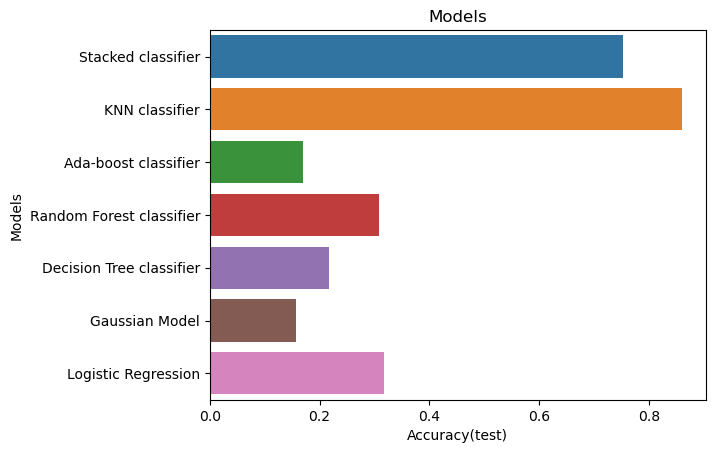

In [94]:
models = final_results['Models']
test_score = final_results['Accuracy(test)']
# ab = round(test_score.reverse(),4)

sns.barplot(test_score,models ,orient='h',order=rvse_list)
# plt.xlabel('Scores')
# for i, v in enumerate(test_score):
#     plt.text(v, i, str(v), ha='left', va='center')
plt.title('Models')
plt.show()

# 'KNN Classifier' test accuracy is 86%